In [588]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.collocations import *
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [589]:
da_ny = pd.read_csv('jobs_1.csv')
#ba_ny = pd.read_csv('jobs_2.csv')
#ds_ny = pd.read_csv('jobs_3.csv')
#de_ny = pd.read_csv('jobs_4.csv')
da_bo = pd.read_csv('jobs_5.csv')
#ba_bo = pd.read_csv('jobs_6.csv')
#ds_bo = pd.read_csv('jobs_7.csv')
#de_bo = pd.read_csv('jobs_8.csv')
da_ch = pd.read_csv('jobs_9.csv')
#ba_ch = pd.read_csv('jobs_10.csv')
#ds_ch = pd.read_csv('jobs_11.csv')
#de_ch = pd.read_csv('jobs_12.csv')
#ds_main = pd.concat([da_ny,ba_ny,ds_ny,de_ny,da_bo,ba_bo,ds_bo,de_bo,da_ch,ba_ch,ds_ch,de_ch],ignore_index=True)
ds_main = pd.concat([da_ny,da_bo,da_ch],ignore_index=True)

In [590]:
summary=ds_main['summary']

In [591]:
summary = summary.apply(lambda x: " ".join(x.lower() for x in x.split()))
summary = summary.str.replace('[^\w\s]','')

In [592]:
stop = stopwords.words('english')
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
summary.head()

0    health care data analyst collect compile organ...
1    knack data familiarity combining manipulating ...
2    financial firm nyc seeking administrative anal...
3    perform data loads data extracts conversions m...
4    looking fulltime data analyst assist large ong...
Name: summary, dtype: object

In [593]:
freq = pd.Series(' '.join(summary).split()).value_counts()[:10]
freq

data          1548
analyst        538
experience     220
years          211
team           159
business       120
role           119
analysis       113
3              110
management     106
dtype: int64

In [594]:
freq = pd.Series(' '.join(summary).split()).value_counts()[-10:]
freq

hana           1
fastpaced      1
trusted        1
le             1
curates        1
periods        1
accelerated    1
midas          1
resourcing     1
doors          1
dtype: int64

In [595]:
freq = list(freq.index)
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
summary.head()

0    health care data analyst collect compile organ...
1    knack data familiarity combining manipulating ...
2    financial firm nyc seeking administrative anal...
3    perform data loads data extracts conversions m...
4    looking fulltime data analyst assist large ong...
Name: summary, dtype: object

In [596]:
TextBlob(summary[1]).words

WordList(['knack', 'data', 'familiarity', 'combining', 'manipulating', 'data', 'tables', 'data', 'sets', 'joins', 'unions', 'etc', 'construct', 'data', 'sets', 'required', 'analysis'])

In [597]:
TextBlob(summary[0]).ngrams(3)

[WordList(['health', 'care', 'data']),
 WordList(['care', 'data', 'analyst']),
 WordList(['data', 'analyst', 'collect']),
 WordList(['analyst', 'collect', 'compile']),
 WordList(['collect', 'compile', 'organize']),
 WordList(['compile', 'organize', 'health']),
 WordList(['organize', 'health', 'care']),
 WordList(['health', 'care', 'data']),
 WordList(['care', 'data', 'include']),
 WordList(['data', 'include', 'medical']),
 WordList(['include', 'medical', 'data']),
 WordList(['medical', 'data', 'financial']),
 WordList(['data', 'financial', 'data'])]

In [598]:
#tokens = nltk.word_tokenize(summary)
type(summary)

pandas.core.series.Series

In [599]:
docs=(summary.tolist())
summary_text = ''.join(docs)

In [600]:
tokens = nltk.word_tokenize(summary_text)

In [601]:
print(len(tokens))

14187


In [602]:
tokens_pos_tag = nltk.pos_tag(tokens)

In [603]:
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

In [604]:
pos_df.head()

,word,POS
0,health,NN
1,care,NN
2,data,NNS
3,analyst,NN
4,collect,VBP


In [605]:
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags

In [606]:
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
10,NN,5087
11,NNS,3177
6,JJ,2481
20,VBG,1035
22,VBP,648
14,RB,404
2,CD,312
21,VBN,199
19,VBD,194
23,VBZ,174


In [607]:
filtered_pos = [ ]

In [608]:
#for one in tokens_pos_tag:
#    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
#        filtered_pos.append(one)

In [609]:
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)

In [610]:
print (len(filtered_pos))

5087


In [611]:
fdist_pos = nltk.FreqDist(filtered_pos)

In [612]:
top_100_words = fdist_pos.most_common(100)

In [613]:
print(top_100_words)

[(('analyst', 'NN'), 524), (('team', 'NN'), 116), (('management', 'NN'), 104), (('role', 'NN'), 100), (('business', 'NN'), 98), (('experience', 'NN'), 94), (('analysis', 'NN'), 91), (('detail', 'NN'), 84), (('attention', 'NN'), 63), (('join', 'NN'), 60), (('report', 'NN'), 54), (('support', 'NN'), 50), (('information', 'NN'), 50), (('quality', 'NN'), 47), (('research', 'NN'), 46), (('development', 'NN'), 45), (('company', 'NN'), 39), (('intelligence', 'NN'), 39), (('health', 'NN'), 38), (('ability', 'NN'), 38), (('work', 'NN'), 35), (('visualization', 'NN'), 35), (('data', 'NN'), 34), (('manage', 'NN'), 34), (('member', 'NN'), 32), (('care', 'NN'), 30), (('group', 'NN'), 30), (('andor', 'NN'), 29), (('organization', 'NN'), 28), (('sap', 'NN'), 27), (('office', 'NN'), 26), (('york', 'NN'), 26), (('model', 'NN'), 24), (('customer', 'NN'), 24), (('position', 'NN'), 23), (('performance', 'NN'), 23), (('product', 'NN'), 23), (('collection', 'NN'), 22), (('construct', 'NN'), 21), (('software

In [614]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))

In [615]:
top_words_df.head()

,pos,count
0,"(analyst, NN)",524
1,"(team, NN)",116
2,"(management, NN)",104
3,"(role, NN)",100
4,"(business, NN)",98


In [616]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS

In [617]:
top_words_df = top_words_df.drop('pos', 1) # drop the previous column

In [618]:
subset_pos = top_words_df[['Word', 'count']]

#tuples_pos = subset_pos.to_dict('split')
tuples_pos = [tuple(x) for x in subset_pos.values]
#tuples_pos=dict((x, y) for y, x in tuples_pos)
subset_pos.head()

,Word,count
0,analyst,524
1,team,116
2,management,104
3,role,100
4,business,98


In [619]:
d=dict(tuples_pos)
d['data'] = 4269
d.items()

dict_items([('analyst', 524), ('team', 116), ('management', 104), ('role', 100), ('business', 98), ('experience', 94), ('analysis', 91), ('detail', 84), ('attention', 63), ('join', 60), ('report', 54), ('support', 50), ('information', 50), ('quality', 47), ('research', 46), ('development', 45), ('company', 39), ('intelligence', 39), ('health', 38), ('ability', 38), ('work', 35), ('visualization', 35), ('data', 4269), ('manage', 34), ('member', 32), ('care', 30), ('group', 30), ('andor', 29), ('organization', 28), ('sap', 27), ('office', 26), ('york', 26), ('model', 24), ('customer', 24), ('position', 23), ('performance', 23), ('product', 23), ('collection', 22), ('construct', 21), ('software', 21), ('governance', 21), ('carrier', 21), ('knowledge', 20), ('audit', 20), ('proficiency', 20), ('firm', 19), ('help', 19), ('description', 19), ('master', 19), ('school', 18), ('medicine', 18), ('world', 18), ('familiarity', 17), ('entry', 17), ('system', 17), ('science', 17), ('assurance', 17)

In [620]:
wordcloud = WordCloud()

In [621]:
wordcloud.generate_from_frequencies(d)

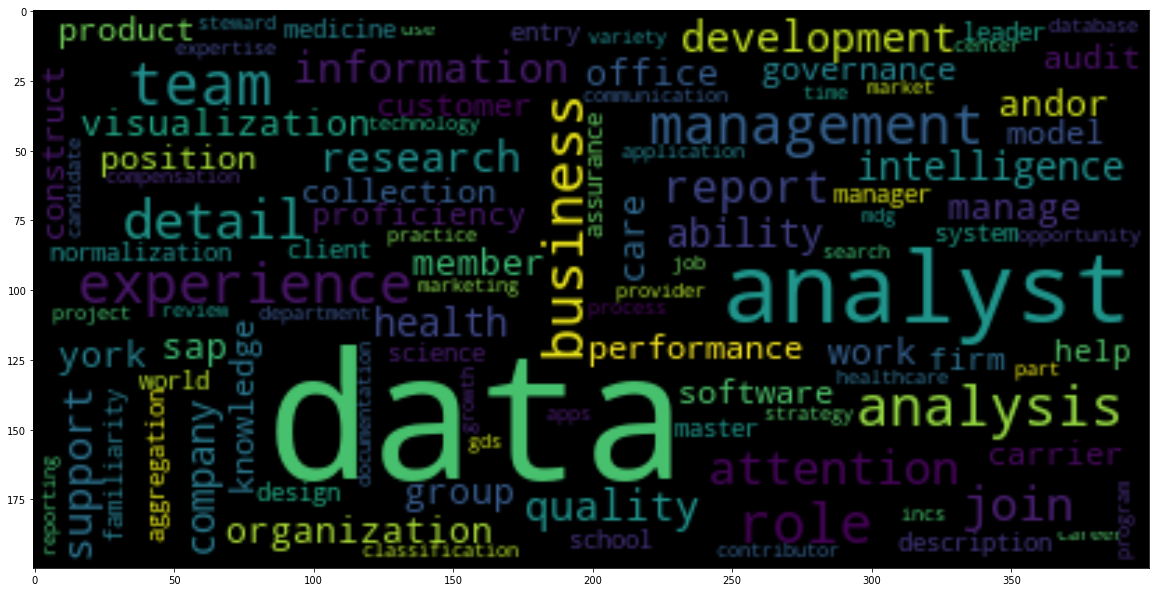

In [622]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

In [623]:
bgs = nltk.bigrams(tokens)

In [624]:
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens

In [625]:
bgs_100 = fdist2.most_common(100) # top-100 bigrams
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))
bgs_df.head()


,bigram,count
0,"(data, analyst)",276
1,"(years, experience)",101
2,"(data, management)",59
3,"(attention, detail)",58
4,"(analyst, report)",45


In [626]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string

In [627]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [628]:
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(data, analyst)",276,data analyst,False
1,"(years, experience)",101,years experience,False
2,"(data, management)",59,data management,False
3,"(attention, detail)",58,attention detail,False
4,"(analyst, report)",45,analyst report,False


In [629]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

In [630]:
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

In [631]:
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

,count,phrase
0,276,data analyst
1,101,years experience
2,59,data management
3,58,attention detail
4,45,analyst report
5,42,data analysis
6,40,analyst role
7,37,analyst join
8,36,data analytics
10,33,data quality


In [632]:
tgs = nltk.ngrams(tokens,4)
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens
tgs_100 = fdist3.most_common(100) # top-100 trigrams
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))
tgs_df.head()


,trigram,count
0,"(years, experience, working, data)",24
1,"(experience, working, data, analyst)",24
2,"(working, data, analyst, report)",22
3,"(data, analyst, report, developer)",22
4,"(analyst, report, developer, similar)",22


In [633]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2]+" "+x[3]) # merging the tuple into a string

In [634]:
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation


In [635]:
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(years, experience, working, data)",24,years experience working data,False
1,"(experience, working, data, analyst)",24,experience working data analyst,False
2,"(working, data, analyst, report)",22,working data analyst report,False
3,"(data, analyst, report, developer)",22,data analyst report developer,False
4,"(analyst, report, developer, similar)",22,analyst report developer similar,False


In [636]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns

In [637]:
tgs_df.reset_index()
tgs_df.head(20) #Final trigrams

,count,phrase
0,24,years experience working data
1,24,experience working data analyst
2,22,working data analyst report
3,22,data analyst report developer
4,22,analyst report developer similar
5,22,report developer similar role
6,22,developer similar role preferably
7,22,similar role preferably healthcare
8,21,responsible collecting analyzing carrier
9,21,collecting analyzing carrier data


In [639]:
subset_pos1 = tgs_df[['phrase', 'count']]
tuples_pos1 = [tuple(x) for x in subset_pos1.values]
d4=dict(tuples_pos1)
#d4['data'] = 4269
d4.items()

dict_items([('years experience working data', 24), ('experience working data analyst', 24), ('working data analyst report', 22), ('data analyst report developer', 22), ('analyst report developer similar', 22), ('report developer similar role', 22), ('developer similar role preferably', 22), ('similar role preferably healthcare', 22), ('responsible collecting analyzing carrier', 21), ('collecting analyzing carrier data', 21), ('analyzing carrier data running', 21), ('carrier data running various', 21), ('seeking experienced data analyst', 19), ('experienced data analyst report', 19), ('data analyst report writer', 19), ('analyst report writer responsible', 19), ('report writer responsible developing', 19), ('writer responsible developing publishing', 19), ('responsible developing publishing new', 19), ('developing publishing new existing', 19), ('years high proficiency excel', 19), ('high proficiency excel including', 19), ('proficiency excel including data', 19), ('excel including data

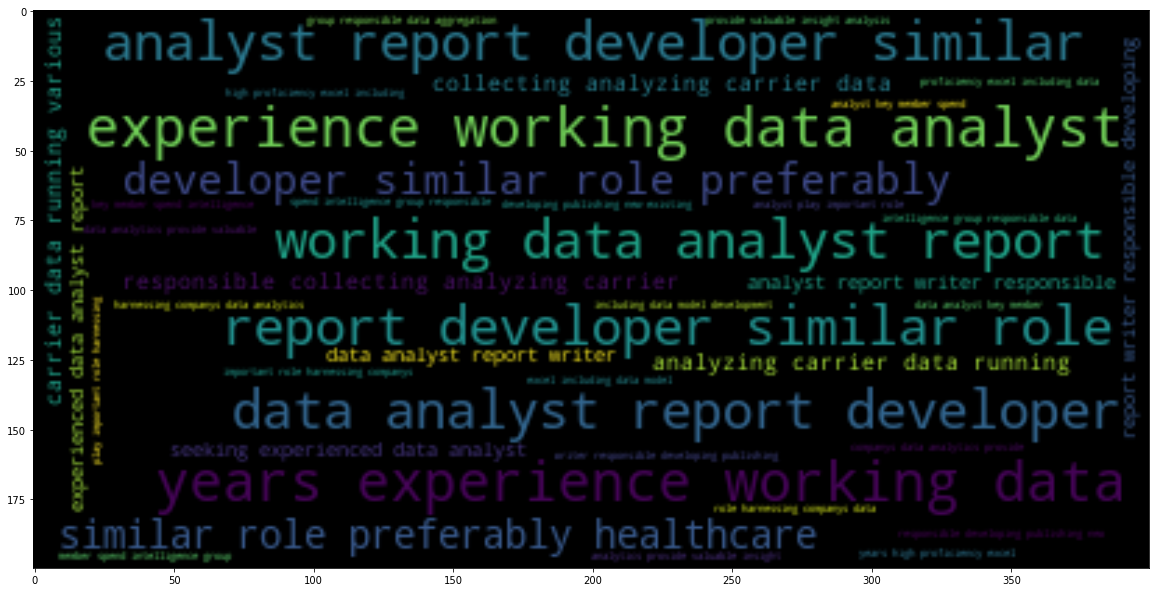

In [640]:
wordcloud.generate_from_frequencies(d4)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()